In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Clustering
## What is clustering?
Clustering is a way of grouping data together so that the are more similar to other data within the same group (cluster) than those in other groups. It's a useful technique when performing Exploratory Data Analysis (EDA) and in unsupervised learning to help identify previously unknown relationships between your data.


### Types of clustering:
In this presentation we'll be foucsing on Centroid-based and Connectivity-based clustering methods as these are the two more widely methods.


1. Centroid-based (K-Means)
2. Connectivity-based (Heirarchical)
3. Distribution-based 
4. Density-based

In this presentation we'll be foucsing on Centroid-based and Connectivity-based clustering methods as these are the two more widely methods. To briefly touch on the other two methods:

## Distribution Based Clustering
A clustering model which most closely relates to (probability) distribution model. Clusters are groups of objects which are most likely a part of same distribution. This method tends to suffer from overfitting unless constraints are put on the model complexity.

## Density Based Clustering
This type of clustering defines a cluster as an area of higher density than the rest of the data set. Objects outside these density areas tend to be considered noise. This method can have poor performance when dealing with overlapping gaussian distributions.


# Centroid Based Clustering (K-Means)
This method randomly assigns groups to all of the data points and then determins the central location for each group (the centroid). Once that is completed the data points are then calculated to determine the distance between each centroid and their cluster is reassigned based upon which centroid is closer. It will then continue to iterate through the data points until no data points are reassigned.

#### How is the distance measured?
When performing k-means clustering distance is caluclated using Euclidean distance. The mathematical formula for Euclidean distance is as follows:

$$ d(p,q)= \sqrt{(q_{1}-p_{1})^2 + (q_{2}-p_{2})^2 + ... + (q_{n}-p_{n})^2}$$

This formula is built on top of the Pythagorean theorm from high school algebra:
$a^2 + b^2 = c^2$ alternatively represented as $c = \sqrt{a^2 + b^2}$

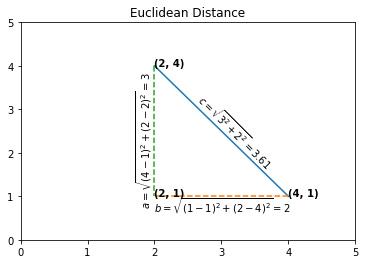

In [2]:
p = (2,4)
q = (4,1)
pq = (2,1)
ax = plt.subplot(111)
ax.plot(*zip(p, q))
ax.plot(*zip(q,pq), linestyle='--')
ax.plot(*zip(p,pq), linestyle='--')
plt.annotate(xy=(1.7,3.5), s='$a = \sqrt{(4-1)^2 + (2-2)^2} = 3$', rotation=90)
plt.annotate(xy=(2,0.65), s='$b = \sqrt{(1-1)^2 + (2-4)^2} = 2$')
plt.annotate(xy=(2.6, 3.1), s='$c = \sqrt{3^2 + 2^2} = 3.61$', rotation=-45)
plt.annotate(xy=p, s=str(p), weight='bold')
plt.annotate(xy=q, s=str(q), weight='bold')
plt.annotate(xy=pq, s=str(pq), weight='bold')
plt.title('Euclidean Distance')
ax.set_ylim(0,5)
ax.set_xlim(0,5);


Let's generate a random list of x,y coordinates and utilize a k of 2 (meaning we want only two clusters) for simplicity. Even though we're only utilizing two clusters this information and technique can easily be extrapolated for any *k* number of clusters

In [3]:
k = 2

colors = {0:'red',1:'blue'}

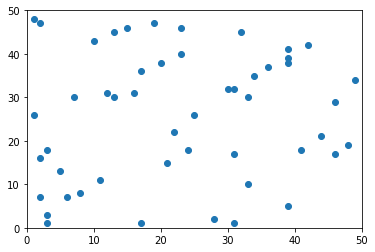

In [4]:
points = 50
random_seed = 789567654
np.random.seed(random_seed)
x = np.random.randint(1,points,points)
y = np.random.randint(1,points,points)
c = np.random.randint(k, size=points)
df = pd.DataFrame.from_dict({'x':x,'y':y,'cluster':c})
df.index = [0] * len(df.index)
df.index.name = 'n'
ax = plt.subplot(111)
ax.scatter(x,y)
ax.set_xlim((0,points))
ax.set_ylim((0,points));

The next step with k-means clustering is each point is assigned a random cluster to start.

In [5]:
def plot_scatter(ax, df, marker = 'o', size=10):
    for idx, c in df['cluster'].iteritems():
        ax.scatter(df.loc[df['cluster'] == c, 'x'], 
                   df.loc[df['cluster'] == c, 'y'], 
                   marker = marker, 
                   label = c, 
                   c = colors[c],
                   s = size)

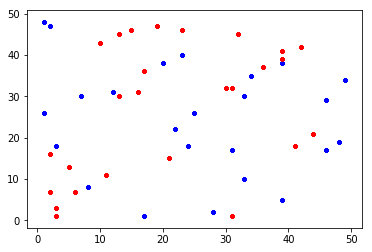

In [6]:
plot_scatter(ax = plt.subplot(111), df = df);

In [7]:
def calculate_centroid(df):
    x = df['x'].mean()
    y = df['y'].mean()
    return (x,y)

In [8]:
def calculate_distance(x, y, c_x, c_y):
    dist = ((c_x - x)**2 + (c_y - y)**2)**0.5
    return dist

In [9]:
def determine_cluster(x, y, n):
    df = df_c.loc[n].copy()
    for c in range(0, k):
        df['dist'] = df.apply(lambda row: 
                              calculate_distance(x, 
                                                 y, 
                                                 row['x'], 
                                                 row['y']), 
                              axis=1)
    return df.loc[df['dist'] == df['dist'].min(), 'cluster']

In [10]:
def plot_kmeans(n):
    ax = plt.subplot(111)
    plot_scatter(ax = ax,
                 df = df_out.loc[n])
    plot_scatter(ax = ax,
                 df = df_c.loc[n],
                size = 80,
                marker = '*')

In [11]:
df_c = pd.DataFrame()


for cluster in range(0, k):
    c_x, c_y = calculate_centroid(
        df[df['cluster'] == cluster]
    )
    df_c = df_c.append(pd.DataFrame({'x':[c_x],
                                     'y':[c_y],
                                     'cluster':[cluster]},
                                    index=[0]),
                      )

In [12]:
N=5
df_cur = df.copy()
df_out = df.copy()
#df_c = pd.DataFrame()

for n in range(1,N):
    df_cur.index = [n] * len(df_cur.index)
    df_cur['cluster'] = df_cur.apply(lambda row: determine_cluster(row['x'], row['y'], n-1), axis=1)

    for cluster in range(0, k):
        c_x, c_y = calculate_centroid(
            df_cur[df_cur['cluster'] == cluster]
        )
        df_c = df_c.append(pd.DataFrame({'x':[c_x],
                                         'y':[c_y],
                                         'cluster':[cluster]},
                                        index=[n]),
                          )
    df_out = df_out.append(df_cur)

In [13]:
import ipywidgets as widgets
n_widget = widgets.IntSlider(
    value=0,
    min=0,
    max=N-1,
    step=1,
    description='N:',
    continuous_update=False,
)
play = widgets.Play(
    interval=2000,
    value=0,
    min=0,
    max=N-1,
    step=1,
    description="Press play",
    disabled=False
)
widgets.jslink((play, 'value'), (n_widget, 'value'))
w = widgets.interactive(plot_kmeans, n=play)
widgets.HBox([w, n_widget])

## sklearn Implementation
`sklearn` simplifies this for us greatly. In typical `sklearn` fashion we just need to import the kmeans method from the `cluster` subpackage and run a variation of the fit* method.

In [14]:
from sklearn.cluster import KMeans
df_k = df[['x','y']]
kmeans = KMeans(n_clusters = 2, random_state = random_seed).fit(df_k)
kmeans.predict(df_k)

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

## Evaluating K-Means Clustering Model
With the example above we utilized a k of 2 to break the data within two separate clusters. How do we know if this was correct or the best choice? How can we tell how well the clustering has performed? When doing clustering we're looking for a happy medium - we want to have the data grouped together to give us additional insight. To few clusters means the data is all the same and we can't utilize any insights. The opposite is true if all of our data points are within their own cluster - we lose those groupings.

This is where two methods come in:
 * Scree / Elbow Plot
 * Silhouette Score & Plot
 
 
 
### Scree / Elbow Plot
A Scree, or sometimes called an Elbow, plot gives us a graphical representation. With this plot we're measuring the within-cluster sum of squares (briefly the total of the  difference  each point is from the mean or centroid, squared). The formula for this is:

$$ \sum_{i=1}^{n}(x_{i} - \bar{x})^2 $$

In `sklean`'s KMeans model this value is stored witin the `inertia_` property.

We can run the KMeans model against different number of clusters and then plot the results to get the resulting Scree / Elbow Plot. When analyzing this plot we're looking to see where the 'elbow' or bend in the graph is most pronounced. This can sometimes become a judgement call depending on the graph and the business requirements surrounding your analysis.

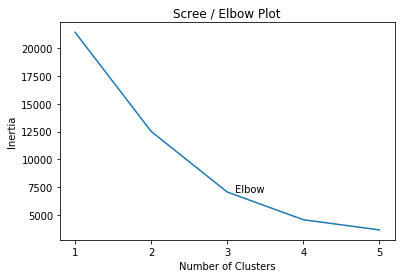

In [15]:
within_ss = []
n = list(range(1,6))
for k in n:
    kmeans = KMeans(n_clusters = k, random_state = random_seed).fit(df_k)
    within_ss.append(kmeans.inertia_)

df_elbow = pd.Series(within_ss, index=n)
ax = df_elbow.plot()
plt.xticks(n)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree / Elbow Plot');

ax.annotate(xy=(3.1, df_elbow[3]), s='Elbow');

## Silhouette Analysis
Silhouette analysis a measurement to determine how close each point in one cluster is to the other clusters.

Scoring is done on a scale between -1 (poorly clustered) and 1 (well clustered).

To utilize Silhouette analysis for determining the best number of clusters we can loop through N number of clusters against the dataset and calculate the score and compare those values seeing which will give the best score.

For n_clusters = 2 The average silhouette_score is : 0.3725844664648939


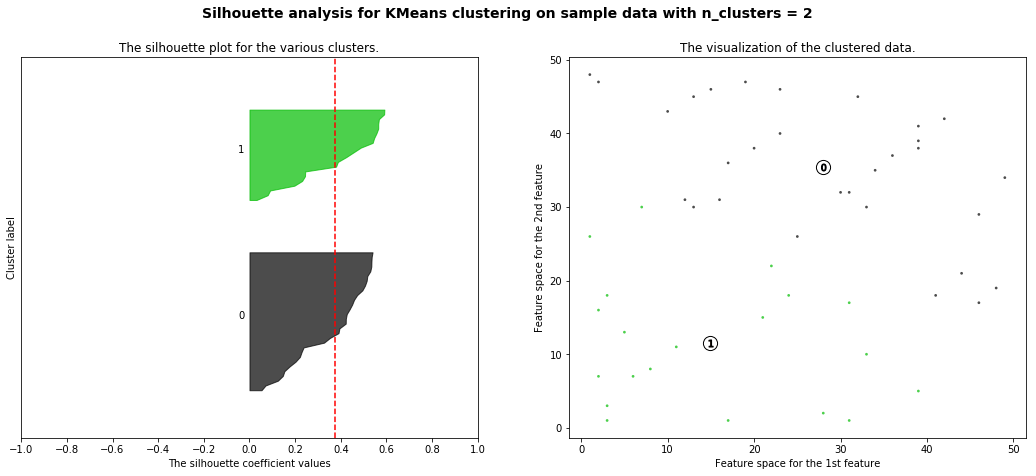

For n_clusters = 3 The average silhouette_score is : 0.42053208086341587


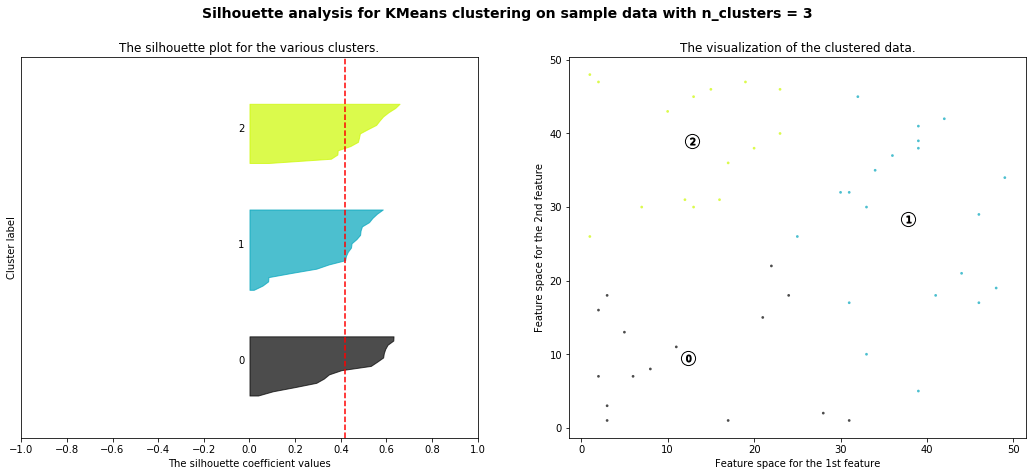

For n_clusters = 4 The average silhouette_score is : 0.44985399891626376


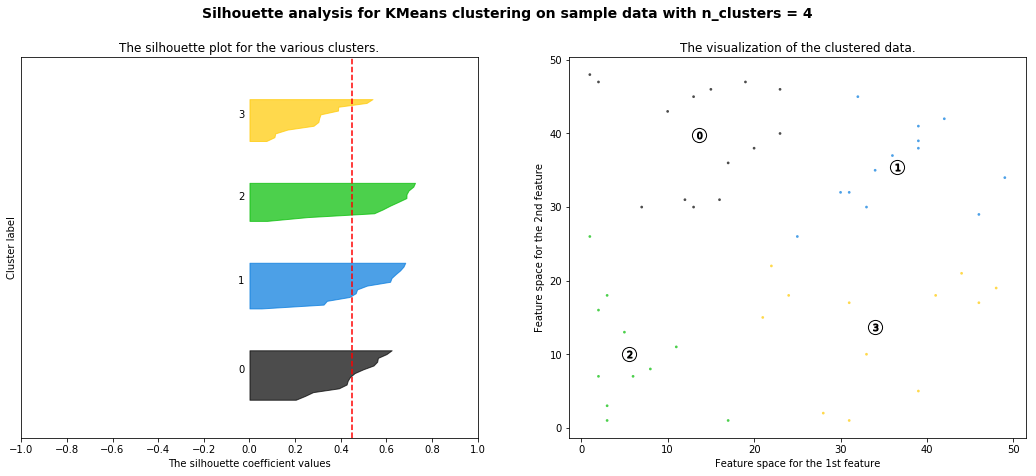

For n_clusters = 5 The average silhouette_score is : 0.44553472897869506


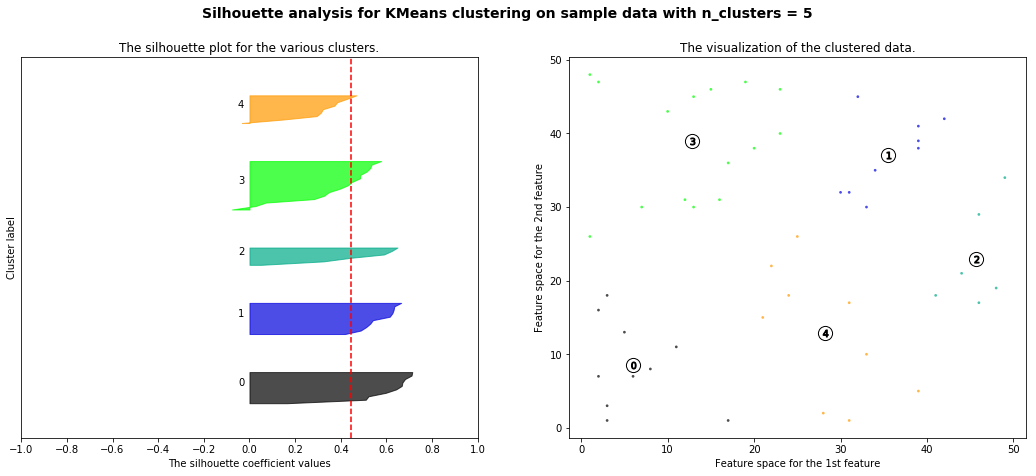

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for k in range(2,6): # 2 - 5 clusters
    # 1 row, 2 columns = silhouette & scatter
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(df.index) + (k + 1) * 10])
    clusterer = KMeans(n_clusters=k, random_state=random_seed)
    cluster_labels = clusterer.fit_predict(df)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", k,
      "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(df['x'], df['y'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = {clusters}".format(clusters = k)),
                 fontsize=14, fontweight='bold')

    plt.show()

# Connectivity-based (Hierarchical)

Hierarchical clustering is an algorithm that builds nested clusters by merging (bottom-up) or splitting (top-down) them successively. This is represented as a tree (also known as a dendogram). The root of the tree is the single cluster which contains all of the samples and the leaves are the clusters with single samples. This tree can be built either top-down or bottom-up with bottom-up being the more common method.

### Distance Measurements

Like K-Means clustering, Hierarchical is a distance based measurement algorithm (also known as affinities with `sklearn`). With Hierarchical clustering the distance measurement can be configured to be:
- **Manhattan distance**
  - Good for sparse data (many of your features are 0)
- **Euclidean distance**
  - Good for non-sparse data.
- **Cosine distance**
  - Invariant / Unaffected by global scaling of the signal.

### Linkage Methods
Each cluster is linked together based on this distance using one of the three following strategies (referred to linkage):
- **Maximum / Complete Linkage:**
  - Minimizes the maximum distance between observations
- **Average Linkage:**
  - Minimizes the average of the distances between all observations of pairs of clusters
- **Ward Linkage:**
  - Minimizes the sum of squared differences within all clusters
  - Only useable with Euclidean distance measurement
  - Less common than Complete or Average linkage

In this session we'll look at building a hierarchical cluster using the bottom-up method with Euclidean distance calculation.